In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import matplotlib.dates as mdates


In [44]:
wuhan_df = pd.read_csv("CleanDatasets/wuhan_final.csv")
wuhan_df

,date,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
0,11/1/2019,157,94,59,52,6,12
1,11/2/2019,152,95,47,55,7,12
2,11/3/2019,158,91,62,25,6,9
3,11/4/2019,157,90,45,16,4,9
4,11/5/2019,175,79,50,34,10,15
...,...,...,...,...,...,...,...
256,7/17/2020,80,49,59,23,5,14
257,7/18/2020,109,45,25,14,3,9
258,7/19/2020,99,25,48,10,2,6
259,7/20/2020,70,64,103,15,3,9


In [45]:
wuhan_df = wuhan_df.set_index("date")
wuhan_df

,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,
11/1/2019,157,94,59,52,6,12
11/2/2019,152,95,47,55,7,12
11/3/2019,158,91,62,25,6,9
11/4/2019,157,90,45,16,4,9
11/5/2019,175,79,50,34,10,15
...,...,...,...,...,...,...
7/17/2020,80,49,59,23,5,14
7/18/2020,109,45,25,14,3,9
7/19/2020,99,25,48,10,2,6


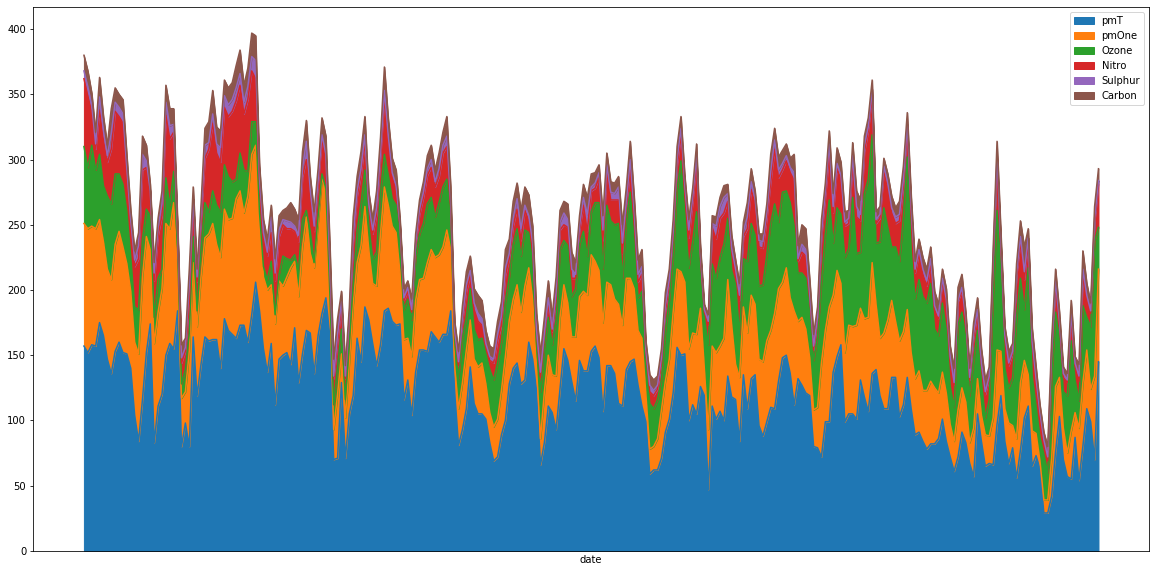

In [55]:
ax = wuhan_df.plot.area(figsize=(20,10))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))


In [56]:
wuhan_quartiles = wuhan_df["pmT"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["pmT"] < lower_bound) | (wuhan_df["pmT"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 96.0
The upper quartile of wuhan is: 151.0
The interquartile range of wuhan is: 55.0
Values below 13.5 could be outliers.
Values above 233.5 could be outliers.


,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,


In [57]:
wuhan_quartiles = wuhan_df["pmOne"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["pmOne"] < lower_bound) | (wuhan_df["pmOne"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 37.0
The upper quartile of wuhan is: 69.0
The interquartile range of wuhan is: 32.0
Values below -11.0 could be outliers.
Values above 117.0 could be outliers.


,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,
12/14/2019,181,123,25,39,11,18


In [58]:
wuhan_quartiles = wuhan_df["Ozone"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["Ozone"] < lower_bound) | (wuhan_df["Ozone"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 25.0
The upper quartile of wuhan is: 55.0
The interquartile range of wuhan is: 30.0
Values below -20.0 could be outliers.
Values above 100.0 could be outliers.


,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,
5/23/2020,107,72,106,37,3,7
6/2/2020,133,52,117,23,2,9
6/25/2020,97,57,107,39,3,11
7/20/2020,70,64,103,15,3,9


In [59]:
wuhan_quartiles = wuhan_df["Nitro"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["Nitro"] < lower_bound) | (wuhan_df["Nitro"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 14.0
The upper quartile of wuhan is: 28.0
The interquartile range of wuhan is: 14.0
Values below -7.0 could be outliers.
Values above 49.0 could be outliers.


,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,
11/1/2019,157,94,59,52,6,12
11/2/2019,152,95,47,55,7,12
11/16/2019,116,94,29,53,12,14
11/23/2019,159,88,18,51,10,13
12/4/2019,162,89,25,52,7,18
12/9/2019,166,89,28,54,9,13
12/10/2019,163,107,15,60,10,17
12/11/2019,173,103,29,52,9,18
12/13/2019,160,112,19,55,10,14


In [64]:
wuhan_quartiles = wuhan_df["Sulphur"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["Sulphur"] < lower_bound) | (wuhan_df["Sulphur"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 3.0
The upper quartile of wuhan is: 6.0
The interquartile range of wuhan is: 3.0
Values below -1.5 could be outliers.
Values above 10.5 could be outliers.


date
11/8/2019     12
11/16/2019    12
11/28/2019    14
12/6/2019     11
12/14/2019    11
12/15/2019    14
12/19/2019    12
12/28/2019    14
3/12/2020     13
4/16/2020     12
Name: Sulphur, dtype: int64

In [65]:
wuhan_quartiles = wuhan_df["Carbon"].quantile([.25,.5,.75])
# Compute the lower quartile
wuhan_lowerq = wuhan_quartiles[0.25]

# Compute the upper quartile
wuhan_upperq = wuhan_quartiles[0.75]
wuhan_iqr = wuhan_upperq-wuhan_lowerq
print(f"The lower quartile of wuhan  is: {wuhan_lowerq}")
print(f"The upper quartile of wuhan is: {wuhan_upperq}")
print(f"The interquartile range of wuhan is: {wuhan_iqr}")
lower_bound = wuhan_lowerq - (1.5*wuhan_iqr)
upper_bound = wuhan_upperq + (1.5*wuhan_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_wuhan = wuhan_df.loc[(wuhan_df["Carbon"] < lower_bound) | (wuhan_df["Carbon"] > upper_bound)]
outlier_wuhan

The lower quartile of wuhan  is: 8.0
The upper quartile of wuhan is: 12.0
The interquartile range of wuhan is: 4.0
Values below 2.0 could be outliers.
Values above 18.0 could be outliers.


,pmT,pmOne,Ozone,Nitro,Sulphur,Carbon
date,,,,,,
11/8/2019,136,72,58,42,12,19
12/15/2019,206,105,18,33,14,19
7/2/2020,102,44,39,23,6,19


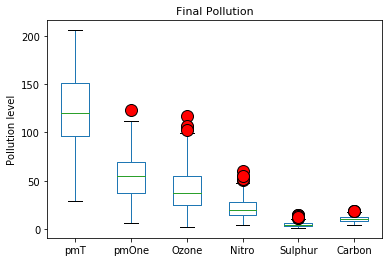

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = wuhan_df.boxplot(grid=False, column=['pmT','pmOne', 'Ozone', 'Nitro', 'Sulphur', 'Carbon'], flierprops=flierprops)

# Set the title and y axis label
box_plot.set_title('Final Pollution', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [49]:
delhi_df = pd.read_csv("CleanDatasets/delhi_final.csv")
delhi_df = delhi_df.sort_values(["date"])
delhi_df

,date,pm25,pm10,o3,no2,so2,co
184,2019-11-01,424,589,13,37,11,27
185,2019-11-02,495,367,6,26,8,18
186,2019-11-03,384,925,5,20,6,31
187,2019-11-04,828,389,9,24,6,17
188,2019-11-05,400,239,17,22,7,13
...,...,...,...,...,...,...,...
16,2020-07-18,132,66,4,12,8,11
17,2020-07-19,119,45,2,11,8,10
18,2020-07-20,97,53,8,13,8,11
19,2020-07-21,77,45,3,12,7,10


In [51]:
delhi_df = delhi_df.set_index("date")
delhi_df

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2019-11-01,424,589,13,37,11,27
2019-11-02,495,367,6,26,8,18
2019-11-03,384,925,5,20,6,31
2019-11-04,828,389,9,24,6,17
2019-11-05,400,239,17,22,7,13
...,...,...,...,...,...,...
2020-07-18,132,66,4,12,8,11
2020-07-19,119,45,2,11,8,10
2020-07-20,97,53,8,13,8,11


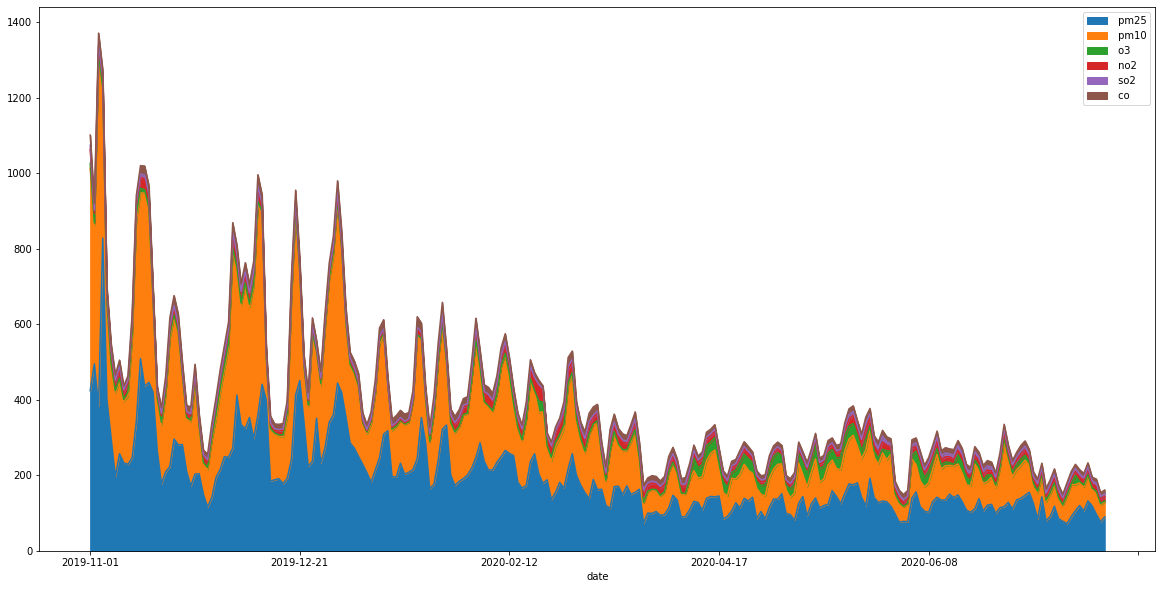

In [52]:
ax = delhi_df.plot.area(figsize=(20,10))